## **ID3: Iterative Dichotomiser 3**

###### ***Author: Tungon Dugi(PhD NIT AR)***

##### **Experiment no. ?:**
 - **Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.**

#### ***Dataset name: Play Tennis***
 - ***available on Kaggle:👉https://www.kaggle.com/tareqjoy/trainplaytennis***

In [213]:
# importing the required libraries
import pandas as pd # for manupulating csv file
import numpy as np # for mathematical calculations
# from sklearn.tree import DecisionTreeClassifier

##### **1. Reading and loading the dataset**
 - **We are going to read the dataset (csv file) and load it into pandas dataframe.**
 - **You can see below, ***df*** is our dataframe.**
 - **With the ***head()*** method of the dataframe we can view the first 5 rows.**

In [214]:
df = pd.read_csv('play_tennis.csv')
df.head

<bound method NDFrame.head of      Outlook Temperature Humidity  Windy Play Tennis
0      Rainy        Cool     High  False          No
1      Rainy         Hot   Normal  False         Yes
2      Rainy        Mild     High  False         Yes
3   Overcast        Mild   Normal  False          No
4      Rainy         Hot     High   True          No
5      Sunny        Cool   Normal   True          No
6      Rainy        Cool     High  False          No
7   Overcast        Cool   Normal  False          No
8      Rainy         Hot   Normal  False         Yes
9      Rainy         Hot     High   True         Yes
10     Sunny        Cool     High   True         Yes
11     Rainy        Mild     High   True         Yes>

In [215]:
play_counts = df['Play Tennis'].value_counts()
play_counts

No     6
Yes    6
Name: Play Tennis, dtype: int64

##### **2. Calculating the entropy of the whole dataset**

***Total row = 12***
 - ***Row with "Yes" = 6***
 - ***Row with "No" = 6***
 - ***Complete entropy of the dataset is:***
    - ***H(s) = -p(Yes) * log(p(Yes)) - p(No) * log(p(No))***
         - ***= -(6/12) * log(6/12) - (6/12) * log(6/12)***
         - ***= 1***

##### **3. Calculating entropy of the feature Outlook**:
 - ***Categorical values of Outlook - Sunny, Overcast and Rain***
   - ***Total count of row containing:***
     - ***Sunny = 2***
     - ***Sunny & Yes = 1***
     - ***Sunny & No = 1***
   - ***H(Outlook=Sunny) = -(1/2)xlog(1/2)-(1/2)xlog(1/2) = 1***
   - ***Total count of row containing:***  
     - ***Rain = 8***
     - ***Rain & Yes = 5***
     - ***Rain & No = 3***
   -  ***H(Outlook=Rain) = -(5/8)xlog(5/8)-(3/8)xlog(3/8) = 0.6858***
   - ***Total count of row containing:***  
     - ***Overcast = 2***
     - ***Overcast & Yes = 0***
     - ***Overcast & No = 2***
   - ***H(Outlook=Overcast) = -(0/2)xlog(0/2)-(2/2)xlog(2/2) = 0***

**Note**: ***We have to do the same for all features like Wind, Humidity etc.***


##### **4. Calculating information gain for a feature**
 - After calculating entropy, we have to calculate the information gain of that feature. 
   - In math, first, we have to calculate the information of that feature like this: (for the feature Outlook)


   - ***I(Outlook) = p(Sunny) * H(Outlook=Sunny) + p(Rain) * H(Outlook=Rain) + p(Overcast) * H(Outlook=Overcast)***
      - ***= (2/12) x 1 + (8/12) x 0.6858 + (2/12)***
      - ***= 0.6239***
 - Then, we have to subtract this from the total entropy of the dataset which is the information gain of the feature.
      - ***Information Gain = H(S) - I(Outlook)***
        - = ***1 - 0.6239***
        - = ***0.3761***

##### **5. Finding the most informative feature (feature with highest information gain)**

 - ***Like Outlook feature, We have to calculate information gain for every feature in the dataset.***
 - ***Then we have to select the feature with the highest information gain.*** 
 - ***After calculating mathematically we will find the values like below***:

 - ***Information gain***:
   - ***Outlook = 0.2467 (Highest value)***
   - ***Temperature = 0.0292***
   - ***Humidity = 0.1518***
   - ***Wind = 0.0481***

**As the feature Outlook has the highest value, so it will be selected for our tree node.**

##### **6. Python implementation for above calculation**

In [216]:
import pandas as pd
import numpy as np


def calc_entropy(data, label):
    class_counts = data[label].value_counts()
    total_instances = len(data)
    entropy = 0

    for count in class_counts:
        probability = count / total_instances
        entropy -= probability * np.log2(probability)

    return entropy


def calc_info_gain(data, feature, label):
    total_entropy = calc_entropy(data, label)
    feature_values = data[feature].unique()
    weighted_entropy = 0

    for value in feature_values:
        subset = data[data[feature] == value]
        subset_entropy = calc_entropy(subset, label)
        probability = len(subset) / len(data)
        weighted_entropy += probability * subset_entropy

    return total_entropy - weighted_entropy


def id3(data, features, label):
    # Base case: If all instances have the same class, return a leaf node with that class
    if len(data[label].unique()) == 1:
        return data[label].iloc[0]

    # Base case: If there are no features left to split on, return the majority class
    if len(features) == 0:
        return data[label].mode().iloc[0]

    # Choose the best feature to split on based on information gain
    info_gains = [calc_info_gain(data, feature, label) for feature in features]
    best_feature_index = np.argmax(info_gains)
    best_feature = features[best_feature_index]

    # Create a tree node with the best feature
    tree = {best_feature: {}}

    # Remove the chosen feature from the list of available features
    remaining_features = [
        feature for feature in features if feature != best_feature]

    # Recursively build the tree for each value of the chosen feature
    for value in data[best_feature].unique():
        subset = data[data[best_feature] == value]
        tree[best_feature][value] = id3(subset, remaining_features, label)

    return tree

# List of features (excluding the target variable 'Play Tennis')
features = ['Outlook', 'Temperature', 'Humidity', 'Windy']

# Build the decision tree using ID3 algorithm
decision_tree = id3(df, features, 'Play Tennis')

# Print the resulting decision tree
print(decision_tree)

{'Temperature': {'Cool': {'Outlook': {'Rainy': 'No', 'Sunny': {'Humidity': {'Normal': 'No', 'High': 'Yes'}}, 'Overcast': 'No'}}, 'Hot': {'Humidity': {'Normal': 'Yes', 'High': {'Outlook': {'Rainy': {'Windy': {True: 'No'}}}}}}, 'Mild': {'Outlook': {'Rainy': 'Yes', 'Overcast': 'No'}}}}


In [217]:
type(decision_tree)

dict

##### **6. Implementing using ID3 algorithm in SkLearn**

 - the ID3 (Iterative Dichotomiser 3) algorithm, can be considered as feature selection algorithms. 
 - Feature selection refers to the process of selecting a subset of relevant features from the original set of features in a dataset
 - The goal is to choose the most informative features that contribute the most to the prediction or classification task.

 - In the context of decision tree algorithms like ID3, feature selection is an integral part of the tree-building process.
 - The algorithm selects features for splitting nodes based on criteria such as information gain (for classification problems) or reduction in mean squared error (for regression problems).

In [218]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [219]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play Tennis
0,Rainy,Cool,High,False,No
1,Rainy,Hot,Normal,False,Yes
2,Rainy,Mild,High,False,Yes
3,Overcast,Mild,Normal,False,No
4,Rainy,Hot,High,True,No


##### **a. Label Encoding for categorical features**
 - ***Label encoding is converting categories (like Rainy or Overcast, Cool or Hot, etc.) into numbers, making it easier for machine learning algorithms to understand and work with them.***
 - ***Categorical features are variables that represent different groups or types of data.***

 1. **Outlook**: Categorical feature representing different weather conditions (Rainy, Overcast, Sunny).
 2. **Temperature**: Categorical feature representing different temperature levels (Cool, Hot, Mild).
 3. **Humidity**: Categorical feature representing humidity levels (High, Normal).
 4. **Windy**: Categorical feature indicating whether it is windy or not (False, True).
 5. **Play Tennis**: Categorical target variable indicating whether tennis is played or not (No, Yes).

These features have discrete and distinct categories, and they are not numeric in nature. They need to be encoded into a numerical format for machine learning algorithms to process them effectively.

In [220]:
# Label encoding for categorical features
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)
df_encoded

,Outlook,Temperature,Humidity,Windy,Play Tennis
0,1,0,0,0,0
1,1,1,1,0,1
2,1,2,0,0,1
3,0,2,1,0,0
4,1,1,0,1,0
5,2,0,1,1,0
6,1,0,0,0,0
7,0,0,1,0,0
8,1,1,1,0,1
9,1,1,0,1,1


##### **b. Separate features and target variable**
 - In the given dataset, the features are the columns ***'Outlook'***, ***'Temperature'***, ***'Humidity'***, and ***'Windy'***, while the target variable is the column ***'Play Tennis'***. 
  - The goal is to separate these features and the target variable.


In [221]:
# Separate features and target variable
X = df_encoded.drop('Play Tennis', axis=1)
y = df_encoded['Play Tennis']

##### **c. Splitting the Dataset into Training and Testing dataset**
 - ***test_size*** is a parameter that defines the proportion of the dataset to include in the testing split. 
 - ***random_state*** is an optional parameter that controls the randomness of the data splitting. When you set random_state to a specific value (e.g., an integer), it ensures reproducibility. The same random split will be obtained if you use the same random seed.
  - If you omit ***random_state*** or set it to `None`, the split will be different every time you run the code.
  - Also ***random_state*** value greatly affects the accuracy of the model

In [222]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

##### **d. Model creation**

In [223]:
# Create a decision tree classifier with the "entropy" criterion
dt_classifier = DecisionTreeClassifier(criterion='entropy')

##### **e. Training**

In [224]:
# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

##### **f. Prediction**

In [225]:
# Predict the target variable on the test set
y_pred = dt_classifier.predict(X_test)

##### **g. Model Evaluation**

In [226]:
# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 66.67%


##### **h.Display the Decision Tree**

In [227]:
# Display the decision tree
from sklearn.tree import export_text
text_representation = export_text(dt_classifier, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(text_representation)

Decision Tree Rules:
|--- Outlook <= 0.50
|   |--- class: 0
|--- Outlook >  0.50
|   |--- Temperature <= 0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 0
|   |   |--- Windy >  0.50
|   |   |   |--- Humidity <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Humidity >  0.50
|   |   |   |   |--- class: 0
|   |--- Temperature >  0.50
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 1
|   |   |--- Windy >  0.50
|   |   |   |--- class: 0



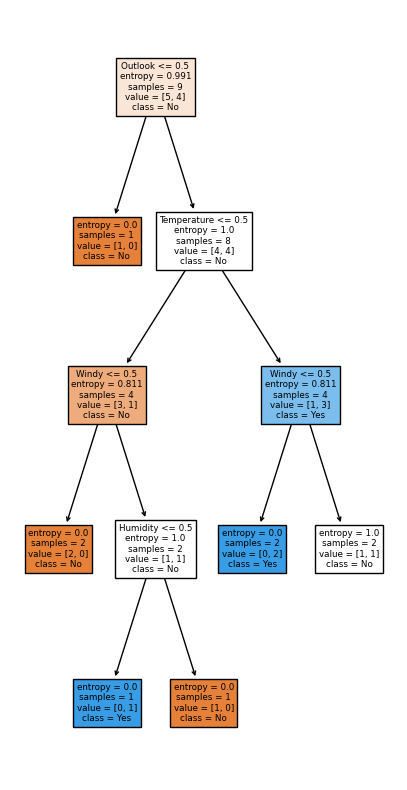

In [228]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(5, 10))
tree.plot_tree(dt_classifier, feature_names=list(X.columns), class_names=label_encoder.classes_,filled=True)
plt.show()

The structure of the decision tree is influenced not only by the information gain but also by the order of features considered during the tree-building process. The ID3 algorithm, and its variations like C4.5 (used by scikit-learn), typically use a heuristic to determine the order of feature selection.

The decision tree-growing algorithm, in scikit-learn's implementation, selects the feature with the highest information gain or Gini impurity at each step. However, if two or more features have the same information gain, the algorithm might choose the feature that appears earlier in the dataset.

In your provided JSON representation of the decision tree, it seems that 'Temperature' is chosen before 'Outlook' even though 'Outlook' has higher information gain. This ordering might be due to the specific heuristic or tie-breaking rule used in the algorithm.

In practice, the decision tree's structure might vary slightly depending on the exact implementation details and the specific version of the machine learning library used. The key point is that the algorithm selects features at each step based on their information gain or Gini impurity, but when multiple features have the same score, other factors, such as the order they appear in the dataset, can influence the decision.

The structure of a decision tree is indeed influenced by both the information gain and the order of features considered during the tree-building process.

 - Information Gain (IG):
     - Information gain is a crucial criterion for selecting the best feature to split the data at each node of the decision tree.
     - It measures how much uncertainty or impurity in the target variable (e.g., classification labels) is reduced after splitting the data based on a particular feature.
     - Features with higher information gain are preferred because they lead to more effective splits, resulting in better separation of classes.

 - Order of Feature Consideration:
     - The order in which features are considered during tree-building impacts the tree’s structure.
     - Decision trees typically use a greedy approach, meaning they select the best feature at each node based on information gain without considering future nodes.
     - The order of feature consideration affects the tree’s depth, shape, and interpretability.
     - Features considered early in the process may have a greater impact on the overall tree structure.

In summary, while information gain guides feature selection, the order in which features are evaluated plays a role in shaping the decision tree. It’s essential to strike a balance between maximizing information gain and maintaining a manageable tree size